Chapter 7 Decision Tree

reference : https://scikit-learn.org/stable/modules/tree.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ในตัวอย่างนี้จะทำการสร้าง decision tree จากชุดข้อมูลสำหรับการทำนายผลจากโรคเบาหวานว่าผู้ป่วยเสียชีวิตหรือไม่ โดยใช้ข้อมูล 2 คุณลักษณะ ได้เเก่ อายุ (age) เเละ ความดันเลือด (bp) โดยอ้างอิงข้อมูลจาก


https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/suffering-diabetes-Data.csv

อ่านข้อมูลเเละเเสดงข้อมูล 5 ตัวอย่างเเรกเพื่อตรวจสอบข้อมูล

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/suffering-diabetes-Data.csv')
df.head()

,age,bp,diabetes
0,65,65,1
1,45,82,0
2,35,73,1
3,45,90,0
4,50,68,1


เเสดงคุณสมบัติของข้อมูลเพื่อตรวจสอบว่ามีข้อมูลสูญหาย หรือ ขาดหายบางส่วนหรือไม่ โดยตรวจสอบจากจำนวนตัวอย่าง (หรือเเถวทั้งหมด)ของข้อมูล เเละจำนวนตัวอย่างในเเต่ละคุณลักษณะ หากไม่เท่ากันเเสดงว่าเกิดการขาดหายของข้อมูล

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       987 non-null    int64
 1   bp        987 non-null    int64
 2   diabetes  987 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


,age,bp,diabetes
0,65,65,1
1,45,82,0
2,35,73,1
3,45,90,0
4,50,68,1
...,...,...,...
982,45,87,0
983,40,83,0
984,40,83,0
985,40,60,1


เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล

In [4]:
df.columns

Index(['age', 'bp', 'diabetes'], dtype='object')

**สร้างการเรียนรู้เเบบ Decision tree**

นำเข้าคลาสของ tree เเละ train_test_split จาก scikit learn โดย

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

กำหนดคุณลักษณะในการเรียนรู้ เเละ คุณลักษณะของผลลัพธ์ จากนั้นทำการเเบ่งข้อมูลสำหรับการเรียนรู้เเละทดสอบ

In [6]:
feature_cols=['age', 'bp']
target_col='diabetes'
X=df[feature_cols]
y=df[target_col]

test_size=.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, random_state=7)

สร้างแบบจำลอง Decision tree

In [7]:
# default ของ sklearn จะพิจารณาการสร้างเเผนภาพต้นไม้ด้วย Gini index 
# โดยสามารถเลือกเกณฑ์การพิจารณาด้วยการกำหนดพารามิเตอร์ criterion
model = tree.DecisionTreeClassifier() 

เเสดงพารามิเตอร์สำหรับการสร้างแบบจำลอง decision tree 

In [10]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

ทดลองกำหนดค่าพารามิเตอร์ โดยกำหนดให้เกณฑ์การพิจารณาโดยใช้ gini index เเละกำหนดขนาดจำนวนการเเตกเเผนภาพได้ดังนี้

In [12]:
params={'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
model=tree.DecisionTreeClassifier(**params)

สร้างแบบจำลอง

In [13]:
model = model.fit(X_train, y_train)

In [17]:
model

DecisionTreeClassifier(max_depth=3)

ทดลองเเสดงค่าความสำคัญของเเต่ละคุณลักษณะ โดย

In [14]:
# print('column_name',X_train.columns)
# model.feature_importances_
fs = pd.Series(model.feature_importances_, index=X_train.columns.sort_values(ascending=True))
fs

age    0.06993
bp     0.93007
dtype: float64

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า $R^2$

In [15]:
model.score(X_train, y_train)

0.9289855072463769

In [16]:
model.score(X_test, y_test)

0.9393939393939394

In [ ]:
model.__dict__

{'ccp_alpha': 0.0,
 'class_weight': None,
 'classes_': array([0, 1]),
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_features_': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_classes_': 2,
 'n_features_': 2,
 'n_outputs_': 1,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best',
 'tree_': <sklearn.tree._tree.Tree at 0x7f74ed6b9ce0>}

ทดลองเเสดงเเผนภาพของ Decision tree ที่สร้างขึ้น

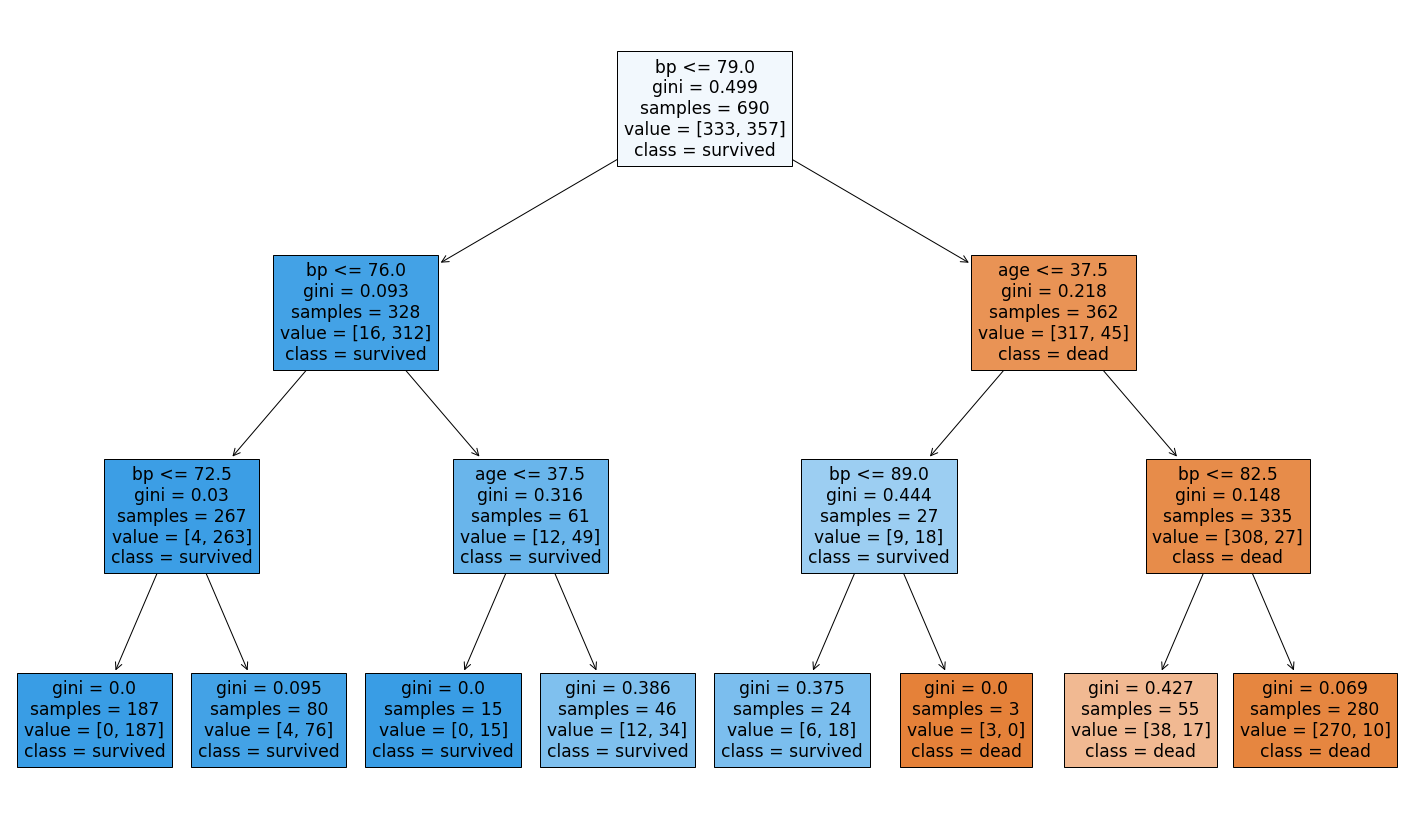

In [ ]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names= feature_cols,class_names=['dead', 'survived'],
                   filled=True)

In [18]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, feature_names, save_tree_img=False):
    estimators=model
    dot_graph=export_graphviz(estimators, 
                feature_names = feature_names,
                class_names = ['dead', 'survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, special_characters=True
                             )
    g=Source(dot_graph)    
    if save_tree_img:
        g.render(f'tree', format='png', view=False, cleanup=True)
    return g

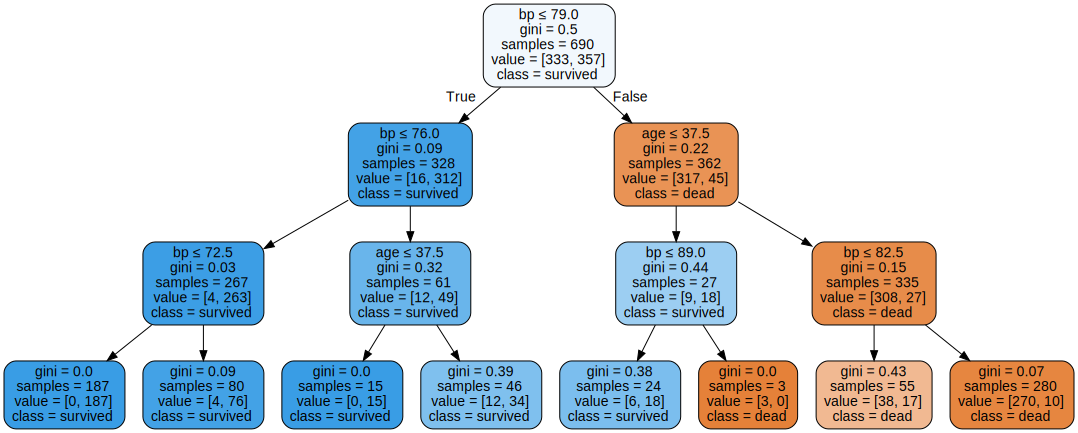

In [ ]:
view_tree(model, feature_cols, False)

In [ ]:
from sklearn import metrics
predicted = model.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')
print(f'precision = {metrics.precision_score(y_test, predicted)}')
print(f'recall = {metrics.recall_score(y_test, predicted)}')

accuracy = 0.9393939393939394
precision = 0.9225352112676056
recall = 0.9492753623188406
